In [1]:
import pandas as pd
from tqdm import tqdm
import os
data = pd.read_csv("ib_data.csv")
visual=['0(base)','1.00E-02','1.00E-03','1.00E-04','1.00E-05','1.00E-06']
audio=['1.00E+01','1.00E+00','0(base).1','1.00E-01','1.00E-02.1','1.00E-03.1','1.00E-04.1','1.00E-05.1','1.00E-06.1']
multi_lib=['0(base).2','1.00E-02.2','1.00E-03.2','1.00E-04.2','1.00E-05.2','1.00E-06.2']
cate=['Arts','Autos','Beauty','Books','Business','Computers','Finance','Food',
        'Games','Health','Hobbies','Home','Internet','Jobs','Law','mr(whole)','News',
        'People','Pets','Real','Reference','Science','Shopping','Sports','Travel']
data.iloc[2]

beta(ib)              NaN
Unnamed: 1          MAP50
0(base)          57.00323
1.00E-02          54.4763
1.00E-03         56.70968
1.00E-04         57.33369
1.00E-05         54.41936
1.00E-06          57.3754
1.00E+01        52.643731
1.00E+00        49.417409
0(base).1        60.55846
1.00E-01         49.92691
1.00E-02.1        52.5355
1.00E-03.1       49.58553
1.00E-04.1       53.48415
1.00E-05.1         49.414
1.00E-06.1       54.44471
0(base).2     61.07118731
1.00E-02.2      59.147434
1.00E-03.2      57.006196
1.00E-04.2      60.969885
1.00E-05.2       60.84351
1.00E-06.2      56.673977
Name: 2, dtype: object

In [2]:
data.iloc[2]['0(base)']

'57.00323'

In [3]:
fscore_v=[]
map50_v=[]
map15_v=[]
fscore_a=[]
map50_a=[]
map15_a=[]
fscore_lib=[]
map50_lib=[]
map15_lib=[]
for i in tqdm(range(len(data))):
    if i != 0:
        if i%3 == 1:
            tmp1=[]
            for j in visual:
                tmp1.append(float(data.iloc[i][j]))
            fscore_v.append(tmp1)
            
            tmp1=[]
            for j in audio:
                tmp1.append(float(data.iloc[i][j]))
            fscore_a.append(tmp1)
            
            tmp1=[]
            for j in multi_lib:
                tmp1.append(float(data.iloc[i][j]))
            fscore_lib.append(tmp1)
        elif i%3 == 2:
            tmp2=[]
            for j in visual:
                tmp2.append(float(data.iloc[i][j]))
            map50_v.append(tmp2)
            
            tmp2=[]
            for j in audio:
                tmp2.append(float(data.iloc[i][j]))
            map50_a.append(tmp2)
            
            tmp2=[]
            for j in multi_lib:
                tmp2.append(float(data.iloc[i][j]))
            map50_lib.append(tmp2) 
        elif i%3 == 0:
            tmp3=[]
            for j in visual:
                tmp3.append(float(data.iloc[i][j]))
            map15_v.append(tmp3)
            
            tmp3=[]
            for j in audio:
                tmp3.append(float(data.iloc[i][j]))
            map15_a.append(tmp3)
            
            tmp3=[]
            for j in multi_lib:
                tmp3.append(float(data.iloc[i][j]))
            map15_lib.append(tmp3) 
        else:
            print(f"{i} th is wrong")


100%|██████████| 76/76 [00:00<00:00, 1106.54it/s]


In [4]:
len(fscore_v)

25

In [5]:
import matplotlib.pyplot as plt
import numpy as np
from adjustText import adjust_text
visualy = ['0(base)'] + [f"$10^{{{int(np.log10(x))}}}$" for x in [10**-2, 10**-3, 10**-4, 10**-5, 10**-6]]
audioy = [f"$10^{{{int(np.log10(x))}}}$" for x in [10,1]] + ['0(base)'] + [f"$10^{{{int(np.log10(x))}}}$" for x in [10**-1,10**-2, 10**-3, 10**-4, 10**-5, 10**-6]]
multiy = ['0(base)'] + [f"$10^{{{int(np.log10(x))}}}$" for x in [10**-2, 10**-3, 10**-4, 10**-5, 10**-6]]


# 設定統一的 Y 軸範圍
y_min = min(np.min(fscore_v), np.min(map50_v), np.min(map15_v),
            np.min(fscore_a), np.min(map50_a), np.min(map15_a),
            np.min(fscore_lib), np.min(map50_lib), np.min(map15_lib))
y_max = max(np.max(fscore_v), np.max(map50_v), np.max(map15_v),
            np.max(fscore_a), np.max(map50_a), np.max(map15_a),
            np.max(fscore_lib), np.max(map50_lib), np.max(map15_lib))

visual_dir = "table/IB_0306/visual"
audio_dir = "table/IB_0306/audio"
multi_lib_dir = "table/IB_0306/multi/lib"

os.makedirs(visual_dir, exist_ok=True)
os.makedirs(audio_dir, exist_ok=True)
os.makedirs(multi_lib_dir, exist_ok=True)
def plt_function(y_axis, fscore, map50, map15, path_dir, plot_type, cate=cate, label_font=20, ticks_font=16):
    
    #圖表大小
    plt.figure(figsize=(12, 6))
    
    #圖表圖示&顏色
    plt.plot(y_axis, fscore[i], color='red', label='F1', marker='o')
    plt.plot(y_axis, map50[i], color='blue', label='MAP50', marker='o')
    plt.plot(y_axis, map15[i], color='green', label='MAP15', marker='o')
    
    texts=[]
    for x, y in zip(y_axis, fscore[i]):
        texts.append(plt.text(x, y, f"{y:.2f}", ha='center', fontsize=16))
    for x, y in zip(y_axis, map50[i]):
        texts.append(plt.text(x, y, f"{y:.2f}", ha='center', fontsize=16))
    for x, y in zip(y_axis, map15[i]):
        texts.append(plt.text(x, y, f"{y:.2f}", ha='center', fontsize=16))
        
    # 自動調整標籤，避免重疊
    adjust_text(texts, only_move={'points': 'y', 'texts': 'y'})#, arrowprops=dict(arrowstyle='simple', color='black'))

    # 標題和標籤
    plt.title(f"Different {plot_type} in {cate[i]} ({plot_type})", fontsize=20)
    plt.xlabel("beta", fontsize=label_font)
    plt.ylabel("score", fontsize=label_font)
    plt.xticks(fontsize=ticks_font)  # 設定 X 軸數值字體大小
    plt.yticks(fontsize=ticks_font)  # 設定 Y 軸數值字體大小
    # 統一 Y 軸範圍
    plt.ylim(0, 70)
        
    # 添加圖例和網格
    plt.legend(loc="lower left")
    plt.grid(True)
    plt.tight_layout()
    # 儲存高解析度圖片
    file_path = os.path.join(path_dir, f"{cate[i]}_{plot_type}.png")
    plt.savefig(file_path, dpi=300)
    
    # 清除圖表，避免重疊
    plt.clf()

for i in range(25):
    plt_function(visualy, fscore_v, map50_v, map15_v, visual_dir, plot_type="visual")
for i in range(25):
    plt_function(audioy, fscore_a, map50_a, map15_a, audio_dir, plot_type="audio")
for i in range(25):
    plt_function(multiy, fscore_lib, map50_lib, map15_lib, multi_lib_dir, plot_type="lib")


/tmp/ipykernel_228479/3727121423.py:27: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(12, 6))


<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

5
5


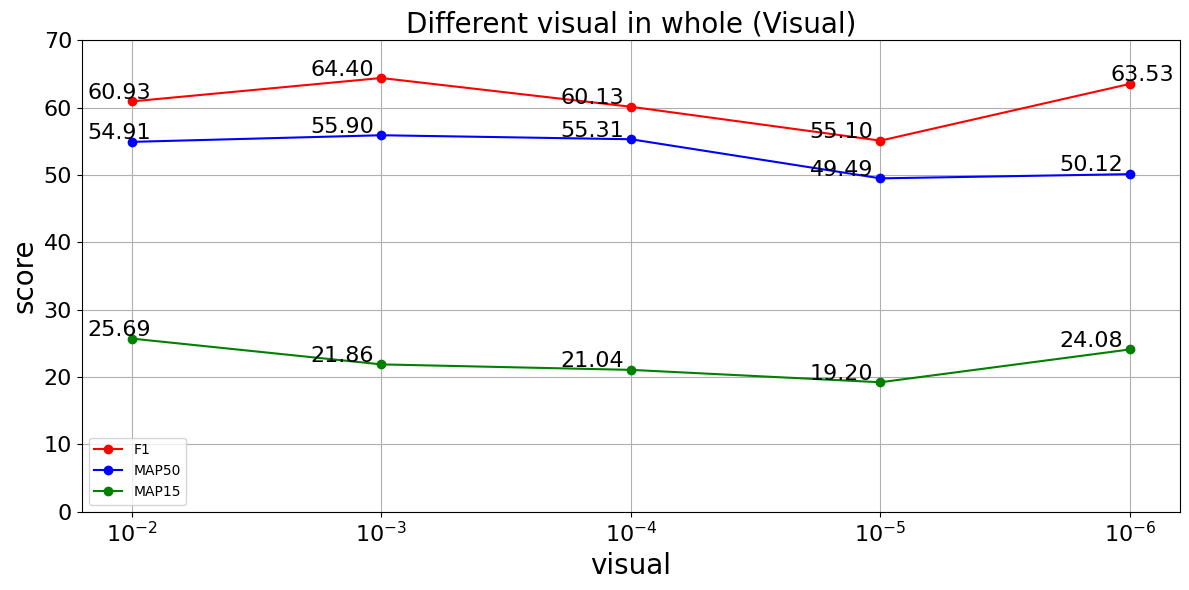

<Figure size 640x480 with 0 Axes>

In [6]:
import matplotlib.pyplot as plt
import numpy as np
from adjustText import adjust_text
fscore_v=[60.926, 64.404,60.131,55.099,63.535]
map50_v=[54.915, 55.9,55.306,49.495,50.121]
map15_v=[25.693,21.858,21.044,19.204,24.083]
visualy = [f"$10^{{{int(np.log10(x))}}}$" for x in [10**-2, 10**-3, 10**-4, 10**-5, 10**-6]]
print(len(visualy))
print(len(fscore_v))
# 設定統一的 Y 軸範圍
y_min = min(np.min(fscore_v), np.min(map50_v), np.min(map15_v),
            np.min(fscore_a), np.min(map50_a), np.min(map15_a))
y_max = max(np.max(fscore_v), np.max(map50_v), np.max(map15_v),
            np.max(fscore_a), np.max(map50_a), np.max(map15_a))

visual_dir = "table/test/visual"

os.makedirs(visual_dir, exist_ok=True)
os.makedirs(audio_dir, exist_ok=True)
plt.figure(figsize=(12, 6))

# 視覺特徵的圖表
plt.plot(visualy, fscore_v, color='red', label='F1', marker='o')
plt.plot(visualy, map50_v, color='blue', label='MAP50', marker='o')
plt.plot(visualy, map15_v, color='green', label='MAP15', marker='o')
texts = []
for x, y in zip(visualy, fscore_v):
    texts.append(plt.text(x, y, f"{y:.2f}", ha='center', fontsize=16))
for x, y in zip(visualy, map50_v):
    texts.append(plt.text(x, y, f"{y:.2f}", ha='center', fontsize=16))
for x, y in zip(visualy, map15_v):
    texts.append(plt.text(x, y, f"{y:.2f}", ha='center', fontsize=16))

# 自動調整標籤，避免重疊
adjust_text(texts, only_move={'points': 'y', 'texts': 'y'})#, arrowprops=dict(arrowstyle='simple', color='black'))

# 標題和標籤
plt.title(f"Different visual in whole (Visual)", fontsize=20)
plt.xlabel("visual", fontsize=20)
plt.ylabel("score", fontsize=20)
plt.xticks(fontsize=16)  # 設定 X 軸數值字體大小
plt.yticks(fontsize=16)  # 設定 Y 軸數值字體大小
# 統一 Y 軸範圍
plt.ylim(0, 70)
    
# 添加圖例和網格
plt.legend(loc="lower left")
plt.grid(True)
plt.tight_layout()
# 儲存高解析度圖片
file_path = os.path.join(visual_dir, f"{cate[i]}_v.png")
plt.savefig(file_path, dpi=300)
plt.show()
# 清除圖表，避免重疊
plt.clf()